# Algoritmos de clasificación

Una de las librerías más populares para la introducción a machine learning es **scikit-learn**. Esto se debe en gran parte a su basta documentación, tutotirales y ejemplos disponibles en internet.

Este notebook tiene como objetivo exponer clasificadores y validarlos como tal. 


### Digits data set

Esta base de datos consta de 1797 imagenes. Cada imagen es de 8x8 pixeles de números entre el 0 y el 9, donde estos digitos están escritos a mano. Con el código siguiente cargamos la base de datos

In [2]:
import numpy as np ## como siempre importamos numpy
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.datasets import load_digits
digitos = load_digits()
digitos.DESCR  ## Información

"Optical Recognition of Handwritten Digits Data Set\n===================================================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of on pixels are counted 

In [16]:
len(digitos.data) ## cantidad de imagenes en el data set

1797

#### Visualización de las imagenes

Cada imagen es de 8x8 pixeles, en términos matriciales, cada imagen es representada por una matriz de 8x8. La forma de visualizar cada imagen es la siguiente

In [35]:
### Representación matricial de las cuatro primeras imagenes del data set
imagen_1 = digitos.images[0]
imagen_2 = digitos.images[1]
imagen_3 = digitos.images[2]
imagen_4 = digitos.images[3]
print imagen_1

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


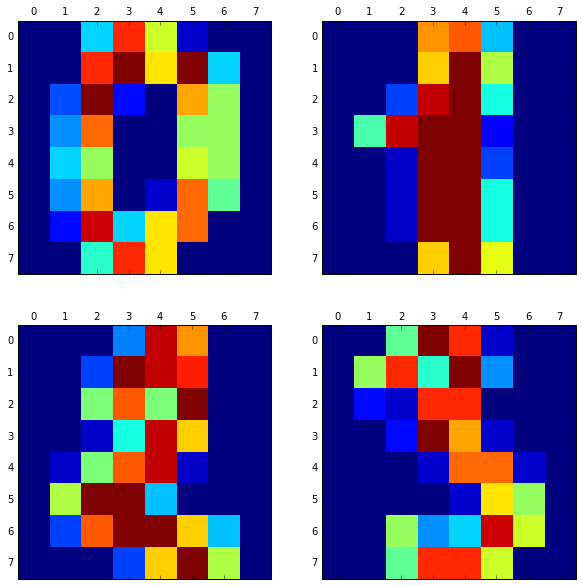

In [38]:
## Visualización ###
f, axis = plt.subplots(2,2,  figsize=(10, 10))
axis[0,0].matshow(imagen_1)
axis[0,1].matshow(imagen_2)
axis[1,0].matshow(imagen_3)
axis[1,1].matshow(imagen_4)
plt.show()

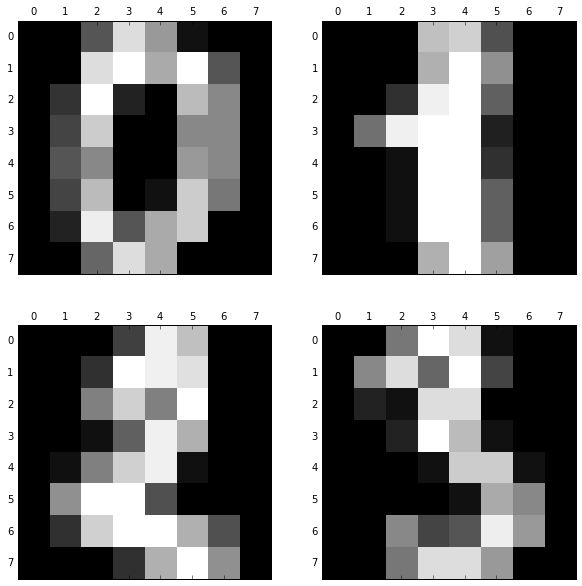

In [45]:
## Usualmente se visualiza en escala de grises ##
plt.gray() ## basta añadir este comando :)
f, axis = plt.subplots(2,2,  figsize=(10, 10))
axis[0,0].matshow(imagen_1)
axis[0,1].matshow(imagen_2)
axis[1,0].matshow(imagen_3)
axis[1,1].matshow(imagen_4)
plt.show()

#### Cada imagen tiene asociada una etiqueta (0,1, .... ó 9). 

In [6]:
etiquetas = digitos.target
print 'la imagen uno corresponde al digito', etiquetas[0]

la imagen uno corresponde al digito 0


**Objetivo: **  Implementar un algoritmo de clásificación, cuyo imput sea cada una de las imagenes presentes en el data set y que nos retorne a que número corresponde. Para implementar dicho algoritmo debemos separar los datos en datos de entrenamiento y datos de testeo.

#### Separamos los datos en datos de entrenamiento y datos de prueba!

In [10]:
## Separamos los datos en datos de entrenamiento y datos de prueba!
from sklearn.model_selection import train_test_split
digitos_train, digitos_test, etiquetas_train, etiquetas_test = train_test_split(digitos.data, etiquetas, test_size=0.3, random_state=0)
print digitos_train.shape, digitos_test.shape, etiquetas_train.shape, etiquetas_test.shape

(1257L, 64L) (540L, 64L) (1257L,) (540L,)


#### Aplicacamos el algoritmo KKN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
vecinos = KNeighborsClassifier(n_neighbors=5)
vecinos.fit(digitos_train, etiquetas_train) ### ajustamos el modelo!
### A continuación vamos a predecir las etiquetas de los datos que dejamos como prueba!!
etiquetas_predichas = vecinos.predict(digitos_test)
### ¿errores? ####
error = 0
for i in range(len(etiquetas_test)):
        if etiquetas_predichas[i] != etiquetas_test[i]:
            error = error + 1
print 'el error es', error , '!!!!', '¿sorprendente no?'            

el error es 10 !!!! ¿sorprendente no?


#### Veamos ahora que etiquetas fueron incorrectamente asignadas

In [38]:
mascara = etiquetas_predichas != etiquetas_test   #### con una simple mascara detectamos las etiquetas incorrectas
print mascara

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False  True False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [68]:
digitos_incorrectos = digitos_test[mascara]   ## digitos mal predichos
etiquetas_correctas = etiquetas_test[mascara] ## etiquetas verdaderas de los que fueron mal predichos
etiquetas_predichas_erroneas = etiquetas_predichas[mascara] ## etiquetas mal puestas
print digitos_incorrectos.shape   ### ahi las 10 imagenes de 8x8 que fueron etiquetadas incorrecta!
print etiquetas_predichas_erroneas, etiquetas_correctas

(10L, 64L)
[7 6 1 3 9 2 5 7 5 6] [2 8 8 8 5 3 9 4 1 5]


#### Visualizamos las imágenes que tuvieron error, en verde el número correcto y en amarillo la etiqueta erronea

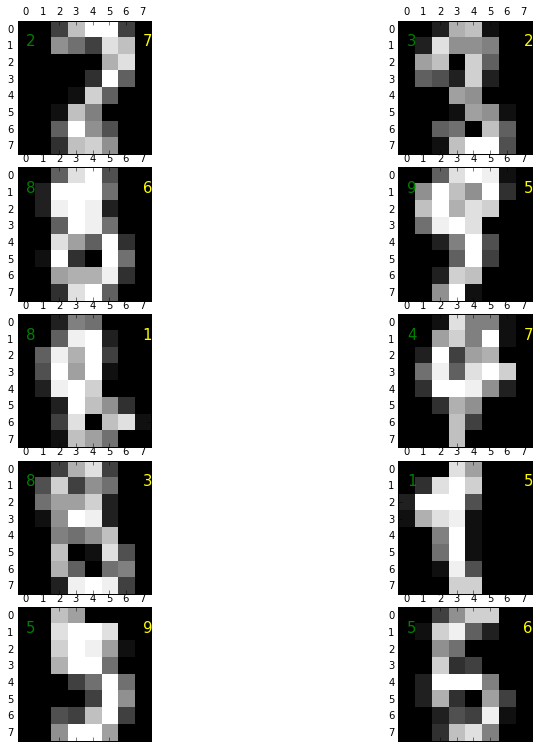

In [98]:
plt.gray() 
f, axis = plt.subplots(5,2 ,figsize=(10,10))
f.tight_layout()
f.subplots_adjust(left=0, bottom=0, right=1, top=1, hspace=0.1)
for j in range(5):
    axis[j,0].matshow(np.reshape(digitos_incorrectos[j], (8,8)))
    axis[j,1].matshow(np.reshape(digitos_incorrectos[j+5], (8,8)))
    axis[j,0].text(7, 1, str(etiquetas_predichas_erroneas[j]),  fontsize=15, color='yellow')
    axis[j,1].text(7, 1, str(etiquetas_predichas_erroneas[j +5]),  fontsize=15, color='yellow')
    axis[j,0].text(0, 1, str(etiquetas_correctas[j]),  fontsize=15, color='green')
    axis[j,1].text(0, 1, str(etiquetas_correctas[j+5]),  fontsize=15, color='green')
plt.show()

### Iris data set


editando!